In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("yRL1380_vacuole.csv")
df

,date,strain,number,how many,count
0,270924,795,1,1,21
1,270924,795,1,2,21
2,270924,795,1,3,11
3,270924,795,1,4,4
4,270924,795,1,5,2
...,...,...,...,...,...
105,270924,1380,3,3,4
106,270924,1380,3,4,2
107,270924,1380,3,1,28
108,270924,1380,3,2,17


In [4]:
def vacuole_class(number):
    """
    This function classify the vacuolar number to 1, 2, 3, and <3.
    """
    if number == 1:
        return 1
    elif number == 2:
        return 2
    elif number == 3:
        return 3
    else:
        return "3<"

In [5]:
df["vacuole_class"] = df["how many"].apply(vacuole_class)
df = df.groupby(["strain", "number", "vacuole_class"], as_index=False).sum()
df

,strain,number,vacuole_class,date,how many,count
0,795,1,1,812772,3,62
1,795,1,2,812772,6,54
2,795,1,3,812772,9,28
3,795,1,3<,1625544,28,15
4,795,2,1,812772,3,58
5,795,2,2,812772,6,57
6,795,2,3,812772,9,12
7,795,2,3<,1354620,22,8
8,795,3,1,1083696,4,42
9,795,3,2,1083696,8,41


In [6]:
# make a dictionary of the number of cells for each strain and each biological replicate
cell_count = df.groupby(['strain', 'number'], as_index=False)['count'].sum()
cell_number = {}
strains = df["strain"].unique().tolist()
cells_number_dict = {}
for strain in strains:
    cell_number[strain] = {}
for _, row in cell_count.iterrows():
    cell_number[row["strain"]][row["number"]] = row["count"]
cell_number

{795: {1: 159, 2: 135, 3: 117},
 897: {1: 84, 2: 55, 3: 95},
 1380: {1: 136, 2: 131, 3: 89}}

In [7]:
# calculate the percentage of each class
df['percentage'] = df.apply(lambda row: row["count"] * 100 / cell_number[row["strain"]][row["number"]], axis=1)
df

,strain,number,vacuole_class,date,how many,count,percentage
0,795,1,1,812772,3,62,38.993711
1,795,1,2,812772,6,54,33.962264
2,795,1,3,812772,9,28,17.610063
3,795,1,3<,1625544,28,15,9.433962
4,795,2,1,812772,3,58,42.962963
5,795,2,2,812772,6,57,42.222222
6,795,2,3,812772,9,12,8.888889
7,795,2,3<,1354620,22,8,5.925926
8,795,3,1,1083696,4,42,35.897436
9,795,3,2,1083696,8,41,35.042735


In [8]:
# calculate the mean and sem of the percentage of each vacular class
df_mean = df.groupby(['strain', 'vacuole_class'], as_index=False).mean()
df_mean = df_mean[['strain', 'vacuole_class', 'percentage']]
df_mean['sem'] = df.groupby(['strain', 'vacuole_class'], as_index=False).std()['percentage'] / np.sqrt(3)
df_mean

,strain,vacuole_class,percentage,sem
0,795,1,39.284703,2.044825
1,795,2,37.075740,2.592075
2,795,3,15.670591,3.492855
3,795,3<,7.968966,1.053119
4,897,1,70.773525,3.588738
5,897,2,18.629908,0.935225
6,897,3,6.722868,1.266143
7,897,3<,3.873699,1.791901
8,1380,1,48.010121,3.489886
9,1380,2,32.198386,0.919368


In [9]:
# obtain the data for each strain
df_mean_795 = df_mean[df_mean['strain']==795]
df_mean_897 = df_mean[df_mean['strain']==897]
df_mean_1380 = df_mean[df_mean['strain']==1380]

## data visualization

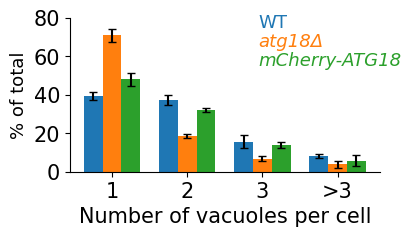

In [17]:
x = np.arange(df_mean['vacuole_class'].nunique())
# settings of the width and distance of the bars
distance = 0.25
width = 0.25
fontsize = 15
fig, ax = plt.subplots(figsize = (4, 2), dpi=100)
# bar plot
ax.bar(x=x, height="percentage", yerr="sem", data=df_mean_795, 
       width=width, capsize=3, ecolor='black')
ax.bar(x=x+distance, height="percentage", yerr="sem", data=df_mean_897, 
       width=width, capsize=3, ecolor='black')
ax.bar(x=x+2*distance, height="percentage", yerr="sem", data=df_mean_1380, 
       width=width, capsize=3, ecolor='black')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# x and y axis settings
ax.set_xticklabels("")
ax.set_xlabel("")
ax.set_xticks(x+distance)
ax.set_xticklabels(["1", "2", "3", ">3"], fontsize=fontsize)
ax.set_xlabel("Number of vacuoles per cell", fontsize=fontsize, loc="center")

ax.set_yticks([0, 20, 40, 60, 80])
ax.set_yticklabels(["0", "20", "40", "60", "80"], fontsize=fontsize)
ax.set_ylabel("% of total", fontsize=13, loc="center")

y = 75
ax.text(2.2, y, 'WT', ha='left', fontsize=fontsize-2, color='#1f77b4')
ax.text(2.2, y-10, 'atg18Δ', ha='left', fontsize=fontsize-2, color='#ff7f0e', fontstyle="italic")
ax.text(2.2, y-20, 'mCherry-ATG18', ha='left', fontsize=fontsize-2, color='#2ca02c', fontstyle="italic")



fig.savefig("yRL1380_vacuole_class.jpg", bbox_inches="tight")
plt.show()